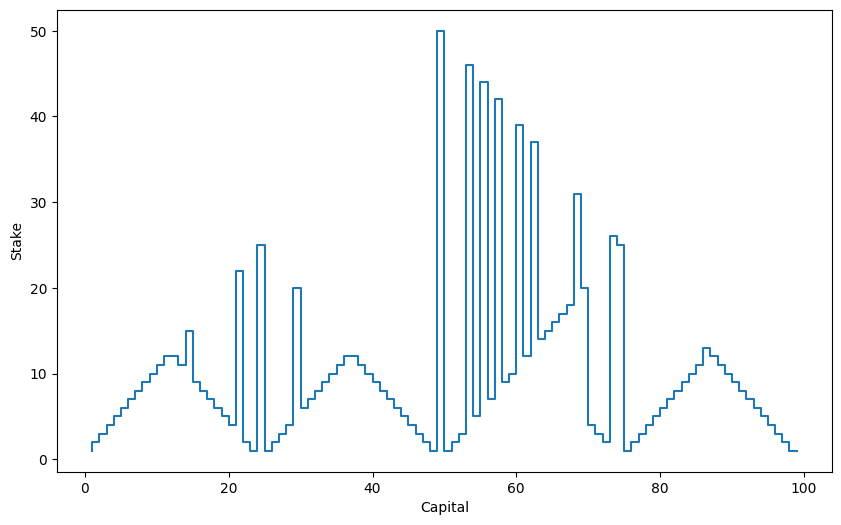

In [117]:
import matplotlib.pyplot as plt

# calculate the expected return of a state given an action
def state_action_value(action, state, values):
    p_heads = 0.4
    if action > state:
        print("Not enough capital")
        return
    value = 0
    if state - action > 0: # Tails, don't run out of money
        value += (1 - p_heads) * values[state - action] 
    if state + action < 100: # Heads, don't reach goal
        value += p_heads * values[state + action]
    else: # Heads, goal reached
        value += p_heads 
    # If we're running out of capital, value is 0
    return value

def value_iteration(threshold):
    nonterminal_states = [i for i in range(1, 100)]
    values = dict()
    # initialise all values to 0
    for i in nonterminal_states:
        values[i] = 0

    value_history = []

    difference = threshold
    while difference >= threshold:
        difference = 0
        new_values = dict()
        for state in nonterminal_states:
            old_value = values[state]
            # The value is the return given by the best action. 
            new_values[state] = max([state_action_value(a, state, values) for a in range(1, min(state, 100 - state) + 1)]) 
            difference = max(difference, abs(old_value - new_values[state]))

        values = new_values.copy()
        value_history.append(values.copy())

    # Now we find the optimal policy
    policy = dict()
    for state in nonterminal_states:
        best_val = 0
        for a in range(1, min(state, 100 - state) + 1):
            val = state_action_value(a, state, values)
            if val > best_val:
                best_val = val
                policy[state] = a
    return policy, value_history
    
policy, value_history = value_iteration(0.000000000000001)
keys = list(policy.keys())
values = list(policy.values())

plt.figure(figsize=(10, 6))
plt.step(keys, values)
plt.xlabel('Capital')
plt.ylabel('Stake')
plt.show()


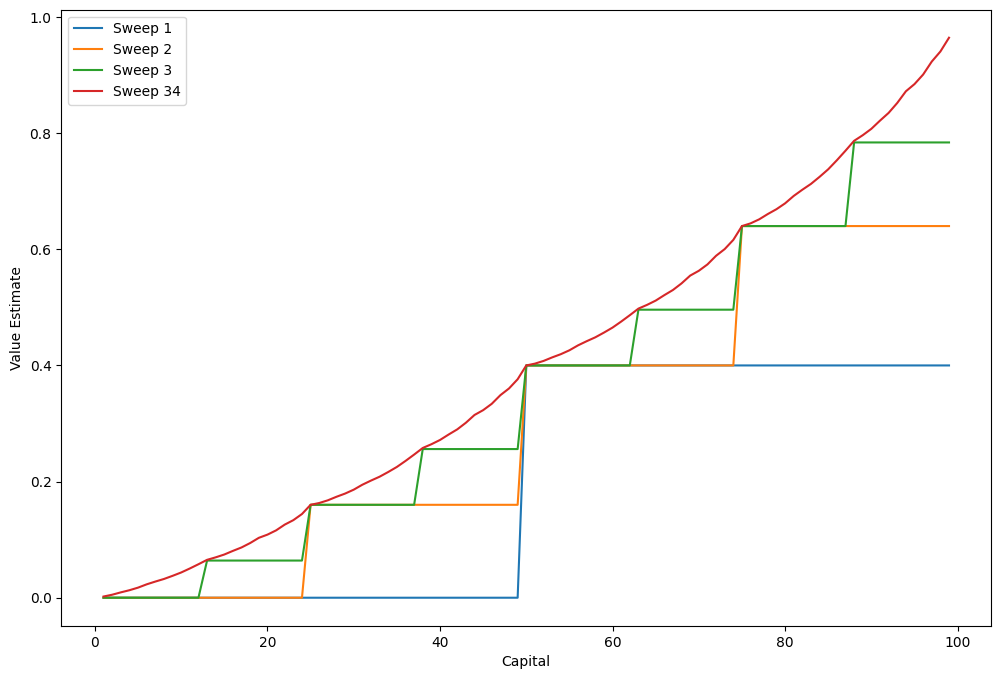

In [118]:
# Plotting the value estimates of each state after the sweeps
plt.figure(figsize=(12, 8))
for i in [0, 1, 2, len(value_history) - 1]:
    values = list(value_history[i].values())
    plt.plot(range(1, 100), values, label=f'Sweep {i+1}')

plt.xlabel('Capital')
plt.ylabel('Value Estimate')
plt.legend()
plt.show()